In [80]:
import sys
import pandas as pd
import sklearn
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import fbeta_score, make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [81]:
data = pd.read_csv('./data_csv.csv')
data.head()


,ID,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,gender,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,Class
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [82]:
data.columns

Index(['ID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Social_Responsiveness_Scale', 'Age_Years', 'Qchat_10_Score',
       'Speech Delay/Language Disorder', 'Learning disorder',
       'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'gender', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'Class'],
      dtype='object')

In [83]:
data.replace('?', np.nan, inplace=True)

In [84]:
columns = ['Social_Responsiveness_Scale','Speech Delay/Language Disorder', 'Learning disorder',
       'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder','Who_completed_the_test','Qchat_10_Score']
data  = data.drop(columns=columns)
data

,ID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,gender,Ethnicity,Jaundice,Family_mem_with_ASD,Class
0,1,0,0,0,0,0,0,1,1,0,1,2,F,middle eastern,Yes,No,No
1,2,1,1,0,0,0,1,1,0,0,0,3,M,White European,Yes,No,Yes
2,3,1,0,0,0,0,0,1,1,0,1,3,M,Middle Eastern,Yes,No,Yes
3,4,1,1,1,1,1,1,1,1,1,1,2,M,Hispanic,No,No,Yes
4,5,1,1,0,1,1,1,1,1,1,1,2,F,White European,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1981,0,0,0,0,0,0,0,0,0,1,7,M,Middle Eastern,No,No,No
1981,1982,0,0,0,0,0,0,0,0,0,0,14,F,south asian,No,No,No
1982,1983,0,0,0,0,0,0,0,0,0,1,7,M,White European,No,No,Yes
1983,1984,0,0,0,0,0,0,0,0,0,0,14,M,Middle Eastern,No,No,No


In [85]:
data.replace('?', np.nan, inplace=True)


In [86]:
data.replace('Age_Years','age')
data.replace('Family_mem_with_ASD','autism')
data.drop(columns=['ID'])

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,gender,Ethnicity,Jaundice,Family_mem_with_ASD,Class
0,0,0,0,0,0,0,1,1,0,1,2,F,middle eastern,Yes,No,No
1,1,1,0,0,0,1,1,0,0,0,3,M,White European,Yes,No,Yes
2,1,0,0,0,0,0,1,1,0,1,3,M,Middle Eastern,Yes,No,Yes
3,1,1,1,1,1,1,1,1,1,1,2,M,Hispanic,No,No,Yes
4,1,1,0,1,1,1,1,1,1,1,2,F,White European,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,0,0,0,0,0,0,0,0,0,1,7,M,Middle Eastern,No,No,No
1981,0,0,0,0,0,0,0,0,0,0,14,F,south asian,No,No,No
1982,0,0,0,0,0,0,0,0,0,1,7,M,White European,No,No,Yes
1983,0,0,0,0,0,0,0,0,0,0,14,M,Middle Eastern,No,No,No


In [87]:
data['Ethnicity'].value_counts()

Ethnicity
White European    549
Asian             392
Middle Eastern    362
asian             213
south asian       206
South Asian        49
Black              45
middle eastern     41
Hispanic           40
Others             35
Latino             26
black               8
PaciFica            8
Mixed               7
Native Indian       3
mixed               1
Name: count, dtype: int64

In [88]:
data['Ethnicity'] = data['Ethnicity'].replace({
    'south asian':'South Asian',
    'middle eastern': 'Middle Eastern',
    'Mixed ': 'mixed',
    
        
    'black':'Black'
})

In [89]:
data['Ethnicity'].value_counts()

Ethnicity
White European    549
Middle Eastern    403
Asian             392
South Asian       255
asian             213
Black              53
Hispanic           40
Others             35
Latino             26
PaciFica            8
Mixed               7
Native Indian       3
mixed               1
Name: count, dtype: int64

In [90]:
data['Ethnicity'] = data['Ethnicity'].replace({
    'mixed':'Mixed',
    'Native Indian':'Others'
})

In [91]:
data['Ethnicity'] = data['Ethnicity'].replace({
    'PaciFica':'Others'
})

In [92]:
data['Ethnicity'].value_counts()

Ethnicity
White European    549
Middle Eastern    403
Asian             392
South Asian       255
asian             213
Black              53
Others             46
Hispanic           40
Latino             26
Mixed               8
Name: count, dtype: int64

In [93]:
data.columns

Index(['ID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Years', 'gender', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class'],
      dtype='object')

In [94]:
categorical = ['gender','Ethnicity','Jaundice','Family_mem_with_ASD']
label = LabelEncoder()

In [95]:
for i in categorical:
    data[i] = label.fit_transform(data[i])

In [96]:
data['gender'].value_counts()

gender
1    1447
0     538
Name: count, dtype: int64

In [97]:
data['Ethnicity'].value_counts()

Ethnicity
8    549
4    403
0    392
7    255
9    213
1     53
6     46
2     40
3     26
5      8
Name: count, dtype: int64

In [98]:
data['Class'] = label.fit_transform(data['Class'])
data['Class']

0       0
1       1
2       1
3       1
4       1
       ..
1980    0
1981    0
1982    1
1983    0
1984    1
Name: Class, Length: 1985, dtype: int32

In [99]:
original_categories = label.inverse_transform(data['Class'])
original_categories

array(['No', 'Yes', 'Yes', ..., 'Yes', 'No', 'Yes'], dtype=object)

In [100]:
X = data.drop(columns=['ID','Class'])
Y = data['Class']

In [101]:
from sklearn import model_selection
# split the X and Y data into training and testing datasets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

In [102]:
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_imputed = imputer.fit_transform(X)

In [103]:
X_imputed.shape

(1985, 15)

In [104]:
Y.shape

(1985,)

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import fbeta_score, make_scorer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np

classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(n_estimators=5, random_state=1),
    "SVM": SVC(kernel='linear', C=1.0, gamma=2),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
    "AdaBoost": AdaBoostClassifier(random_state=0)
}

# Define a custom scoring function for fbeta_score
scoring = make_scorer(fbeta_score, beta=0.5)

# Create an empty list to store pipelines
pipelines = []

# Iterate through each classifier
for name, classifier in classifiers.items():
    print(f"Evaluating {name}")
    
    # Cross-validation with fbeta_score
    cv_scores_fbeta = cross_val_score(classifier, X_imputed, Y, cv=10, scoring=scoring)
    print(f"Cross-validated Fbeta Score: {np.mean(cv_scores_fbeta)}")
    
    # Cross-validation with ROC AUC score
    cv_scores_roc_auc = cross_val_score(classifier, X_imputed, Y, cv=10, scoring='roc_auc')
    print(f"Cross-validated ROC AUC Score: {np.mean(cv_scores_roc_auc)}")
    
    # Create a pipeline with the classifier and fit it
    classifier_clone = clone(classifier)
    pipeline = Pipeline([
        ('classifier', classifier_clone)
    ])
    pipeline.fit(X_train_imputed, Y_train)
    pipelines.append((name, pipeline))
    
    # Make predictions on the test data using the pipeline
    predictions_test = pipeline.predict(X_test_imputed)
    
    # Evaluate the predictions using fbeta_score
    fbeta = fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)
    
    print(f"Fbeta Score on Test Set: {fbeta}")
    
    confusion = metrics.confusion_matrix(Y_test, predictions_test)
    print(confusion)
    print("===")
    

Evaluating Decision Tree
Cross-validated Fbeta Score: 0.9241217841430431
Cross-validated ROC AUC Score: 0.9187721330244696
Fbeta Score on Test Set: 0.9300184162062615
[[164  15]
 [ 16 202]]
===
Evaluating Random Forest
Cross-validated Fbeta Score: 0.9373461279201447
Cross-validated ROC AUC Score: 0.977076876274357
Fbeta Score on Test Set: 0.9459459459459457
[[166  13]
 [  8 210]]
===
Evaluating SVM
Cross-validated Fbeta Score: 0.6328553314711114
Cross-validated ROC AUC Score: 0.8360416556068729
Fbeta Score on Test Set: 0.8109404990403071
[[142  37]
 [ 49 169]]
===
Evaluating KNN
Cross-validated Fbeta Score: 0.8969862019475604
Cross-validated ROC AUC Score: 0.9477348757011494
Fbeta Score on Test Set: 0.9220183486238531
[[162  17]
 [ 17 201]]
===
Evaluating Logistic Regression
Cross-validated Fbeta Score: 0.7512739391143207
Cross-validated ROC AUC Score: 0.8883721629251902
Fbeta Score on Test Set: 0.819755600814664
[[149  30]
 [ 57 161]]
===
Evaluating Linear Discriminant Analysis
Cross-

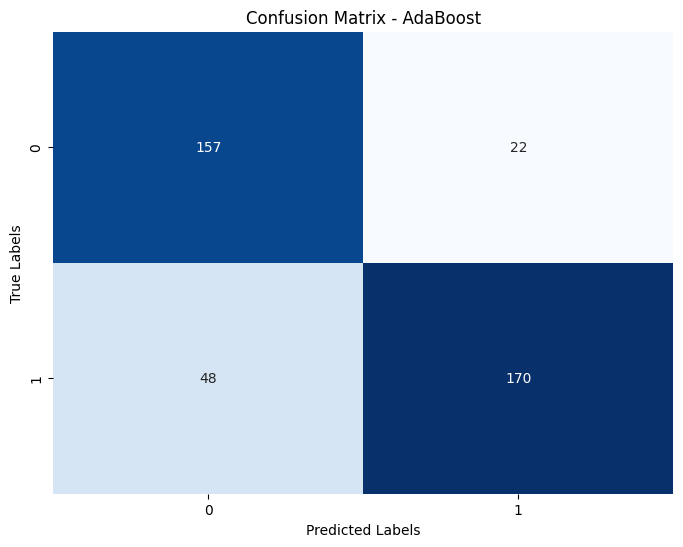

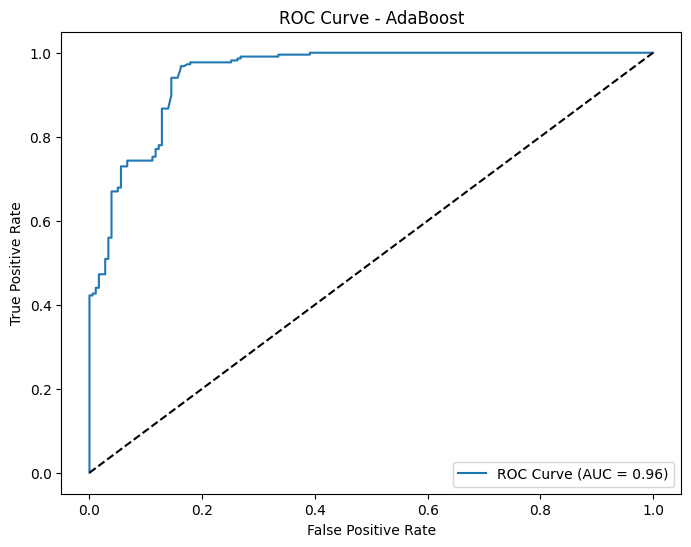

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Get decision function scores
decision_scores = pipeline.decision_function(X_test_imputed)

# Calculate ROC curve
fpr, tpr, _ = metrics.roc_curve(Y_test, decision_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {np.mean(cv_scores_roc_auc):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {name}')
plt.legend(loc='lower right')
plt.show()

Evaluating Decision Tree
Cross-validated Fbeta Score: 0.9241217841430431
Cross-validated ROC AUC Score: 0.9187721330244696
Fbeta Score on Test Set: 0.9300184162062615
[[164  15]
 [ 16 202]]
===


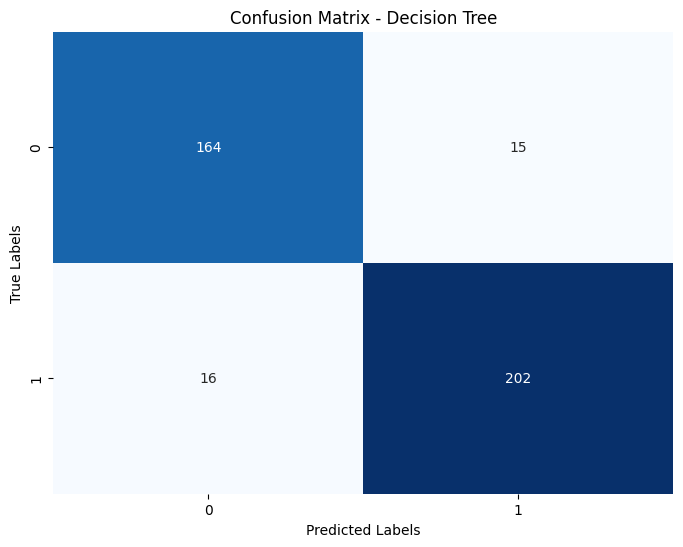

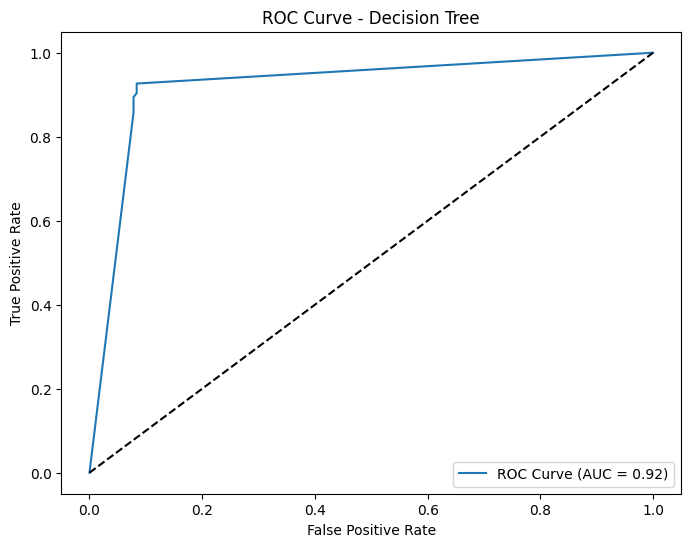

Evaluating Random Forest
Cross-validated Fbeta Score: 0.9373461279201447
Cross-validated ROC AUC Score: 0.977076876274357
Fbeta Score on Test Set: 0.9459459459459457
[[166  13]
 [  8 210]]
===


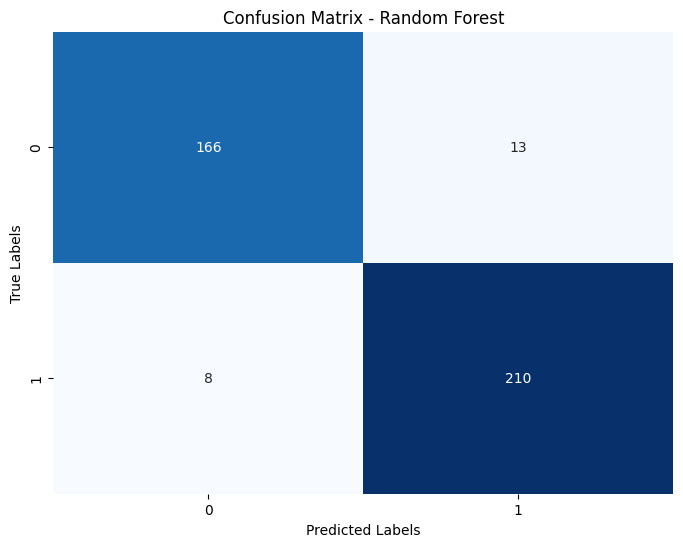

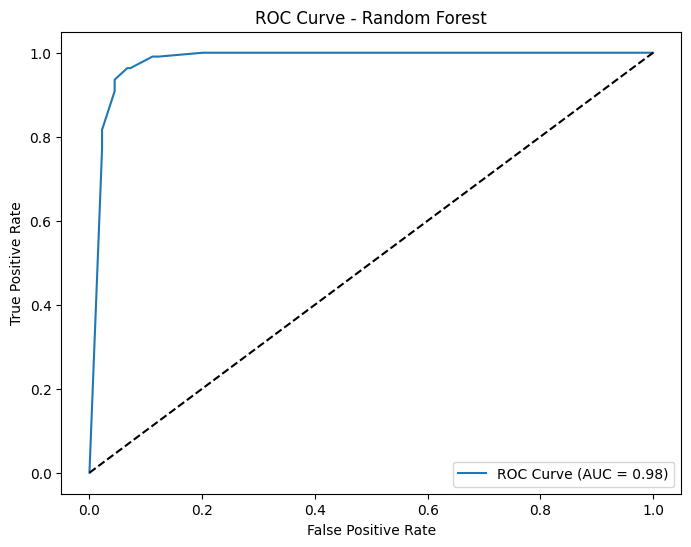

Evaluating SVM
Cross-validated Fbeta Score: 0.6328553314711114
Cross-validated ROC AUC Score: 0.8360416556068729
Fbeta Score on Test Set: 0.8109404990403071
[[142  37]
 [ 49 169]]
===


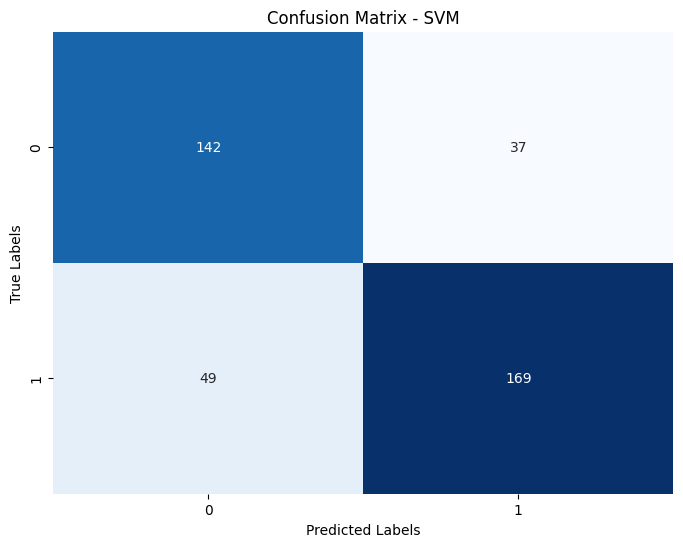

SVM classifier does not support probability estimation, skipping ROC curve plot.


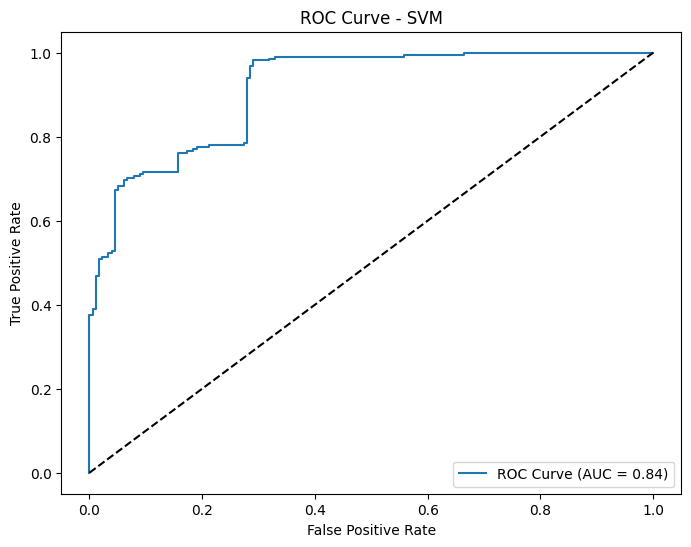

Evaluating KNN
Cross-validated Fbeta Score: 0.8969862019475604
Cross-validated ROC AUC Score: 0.9477348757011494
Fbeta Score on Test Set: 0.9220183486238531
[[162  17]
 [ 17 201]]
===


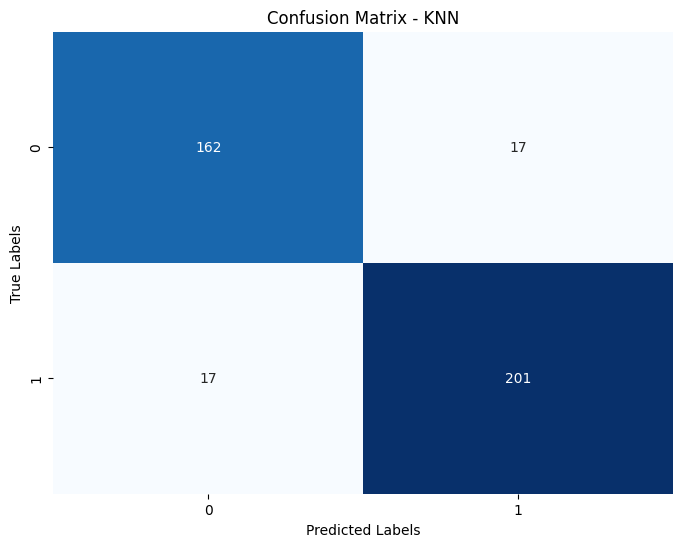

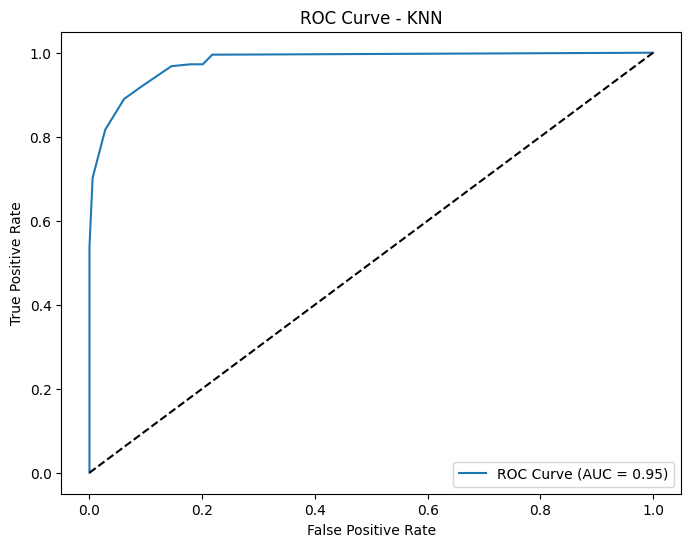

Evaluating Logistic Regression
Cross-validated Fbeta Score: 0.7512739391143207
Cross-validated ROC AUC Score: 0.8883721629251902
Fbeta Score on Test Set: 0.819755600814664
[[149  30]
 [ 57 161]]
===


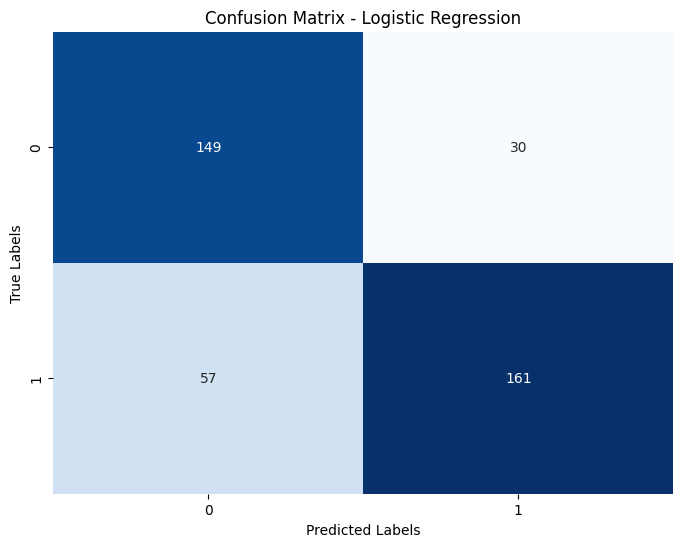

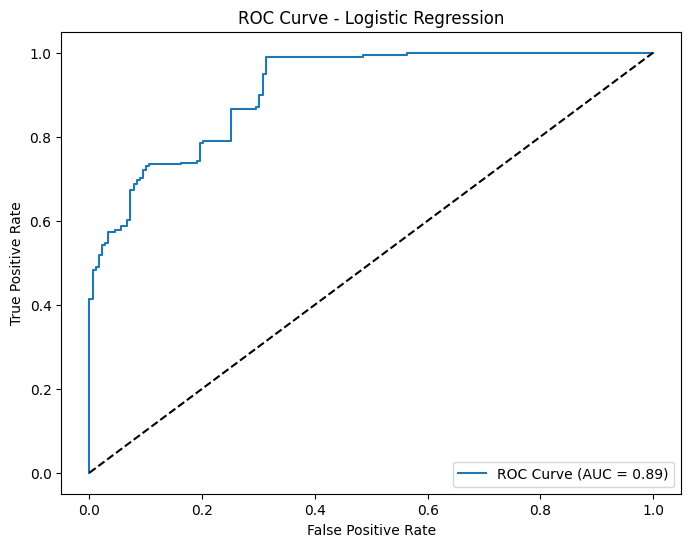

Evaluating Linear Discriminant Analysis
Cross-validated Fbeta Score: 0.6388718579357942
Cross-validated ROC AUC Score: 0.8712959407290981
Fbeta Score on Test Set: 0.8528784648187634
[[159  20]
 [ 58 160]]
===


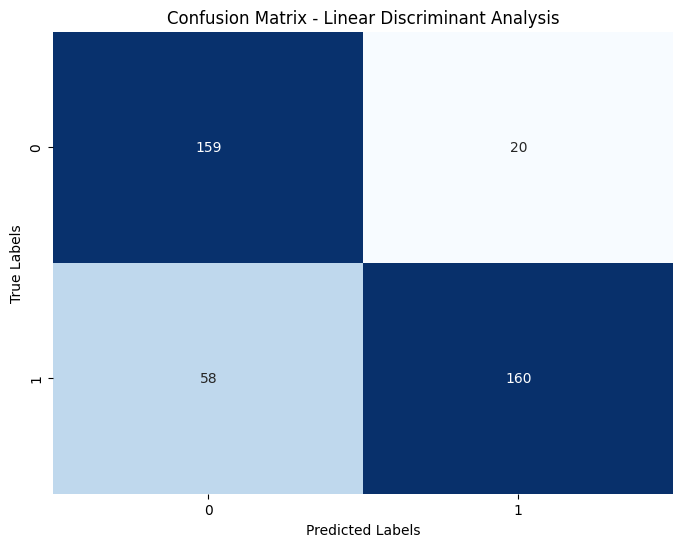

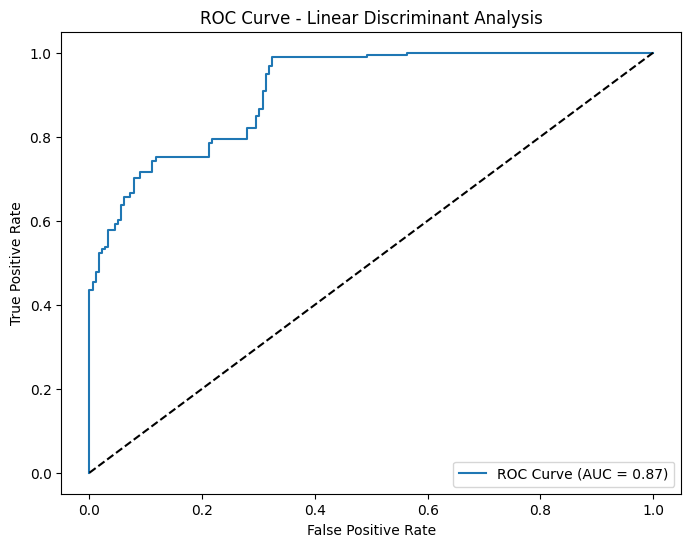

Evaluating Quadratic Discriminant Analysis
Cross-validated Fbeta Score: 0.5858167986977035
Cross-validated ROC AUC Score: 0.9762666378574547
Fbeta Score on Test Set: 0.7788671023965141
[[147  32]
 [ 75 143]]
===


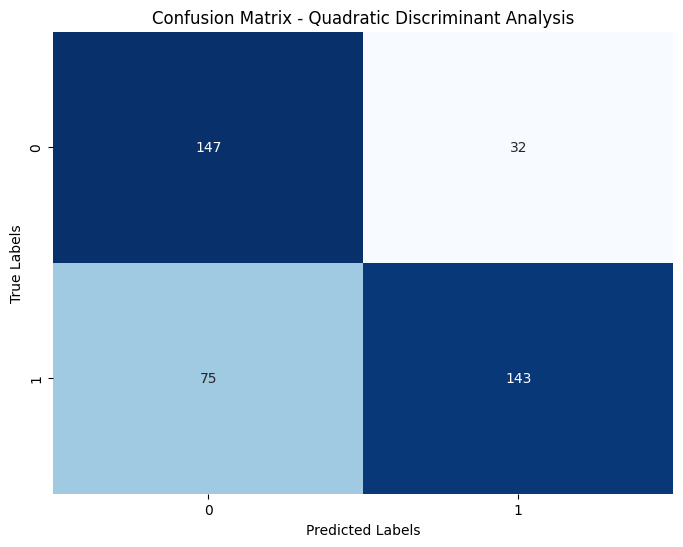

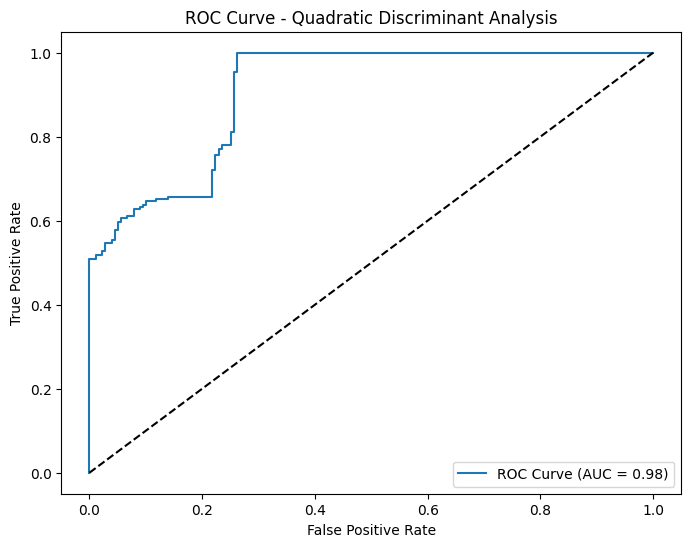

Evaluating Gradient Boosting
Cross-validated Fbeta Score: 0.9123344974132458
Cross-validated ROC AUC Score: 0.9850886280183314
Fbeta Score on Test Set: 0.9391771019677996
[[164  15]
 [  8 210]]
===


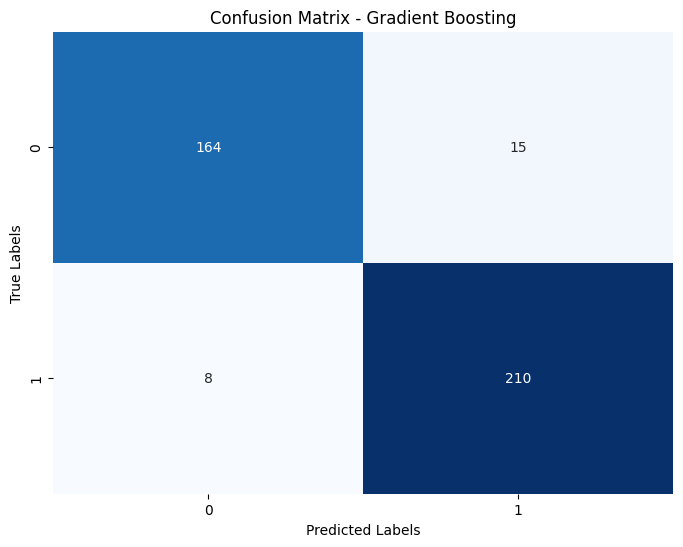

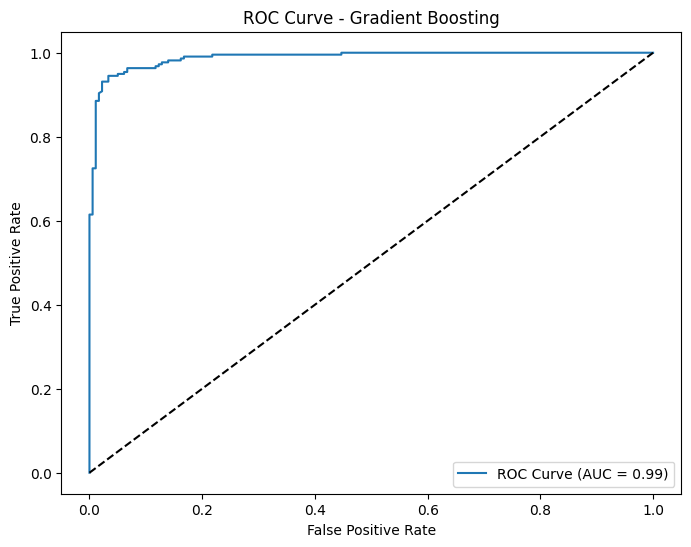

Evaluating AdaBoost
Cross-validated Fbeta Score: 0.7690408310578527
Cross-validated ROC AUC Score: 0.9637605249957952
Fbeta Score on Test Set: 0.8620689655172413
[[157  22]
 [ 48 170]]
===


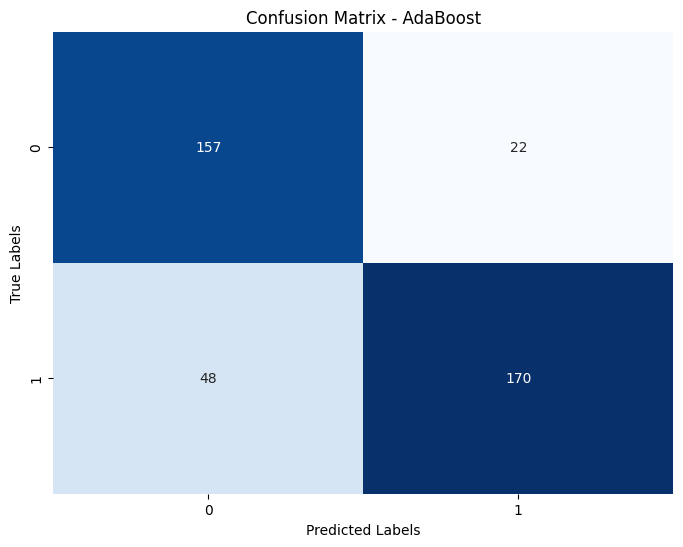

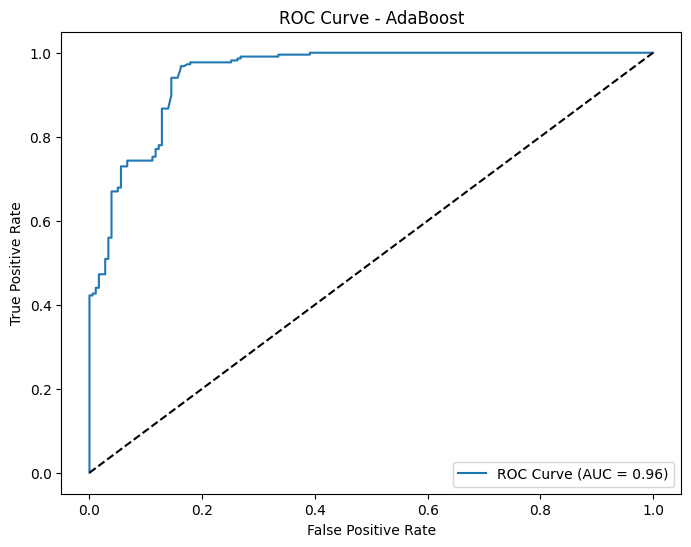

In [111]:
for name, classifier in classifiers.items():
    print(f"Evaluating {name}")
    
    # Cross-validation with fbeta_score
    cv_scores_fbeta = cross_val_score(classifier, X_imputed, Y, cv=10, scoring=scoring)
    print(f"Cross-validated Fbeta Score: {np.mean(cv_scores_fbeta)}")
    
    # Cross-validation with ROC AUC score
    cv_scores_roc_auc = cross_val_score(classifier, X_imputed, Y, cv=10, scoring='roc_auc')
    print(f"Cross-validated ROC AUC Score: {np.mean(cv_scores_roc_auc)}")
    
    # Create a pipeline with the classifier and fit it
    classifier_clone = clone(classifier)
    pipeline = Pipeline([
        ('classifier', classifier_clone)
    ])
    pipeline.fit(X_train_imputed, Y_train)
    pipelines.append((name, pipeline))
    
    # Make predictions on the test data using the pipeline
    predictions_test = pipeline.predict(X_test_imputed)
    
    # Evaluate the predictions using fbeta_score
    fbeta = fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)
    
    print(f"Fbeta Score on Test Set: {fbeta}")
    
    confusion = metrics.confusion_matrix(Y_test, predictions_test)
    print(confusion)
    print("===")
    
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    # Plot ROC curve if classifier supports probability estimation
    if hasattr(classifier, 'predict_proba'):
        fpr, tpr, _ = metrics.roc_curve(Y_test, pipeline.predict_proba(X_test_imputed)[:, 1])
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {np.mean(cv_scores_roc_auc):.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.show()
    else:
        print(f"{name} classifier does not support probability estimation, skipping ROC curve plot.")
        # Get decision function scores
        decision_scores = pipeline.decision_function(X_test_imputed)

        # Calculate ROC curve
        fpr, tpr, _ = metrics.roc_curve(Y_test, decision_scores)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {np.mean(cv_scores_roc_auc):.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.show()


In [112]:
import joblib

# Save the trained model
model_filename = 'autism_updated_child_model.joblib'
joblib.dump(classifiers, model_filename)

['autism_updated_child_model.joblib']

In [113]:
pipelines = []

# Iterate through each classifier and create a pipeline
for name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('imputer', imputer),
        ('classifier', classifier)
    ])
    pipeline.fit(X_imputed, Y)
    pipelines.append((name, pipeline))

In [114]:
joblib.dump(pipelines, 'autism__updated_child_detection_pipelines.pkl')

['autism__updated_child_detection_pipelines.pkl']

In [115]:
# import the dataset
file = 'Autism-Child-Data.txt'

# read the csv
data_test = pd.read_table(file, sep = ',', index_col = None)

In [118]:
data_test.replace('?', np.nan, inplace=True)

In [119]:
data_test = data_test.drop(columns=['contry_of_res', 'used_app_before','age_desc', 'relation'])

In [121]:
data_test['ethnicity'].value_counts()

ethnicity
White-European       108
Asian                 46
'Middle Eastern '     27
'South Asian'         21
Others                14
Black                 14
Latino                 8
Hispanic               7
Pasifika               2
Turkish                2
Name: count, dtype: int64

In [122]:
categorical = ['gender','result','ethnicity','jundice','austim']
label = LabelEncoder()


In [124]:
for i in categorical:
    data_test[i] = label.fit_transform(data_test[i])

In [132]:
x = data_test.drop(columns=['Class','result'])

In [133]:
x.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim'],
      dtype='object')

In [136]:
data_test['Class'] = label.fit_transform(data_test['Class'])

In [137]:
y = data_test['Class']

In [138]:
imputer = SimpleImputer(strategy='most_frequent')

In [139]:
ximputed = imputer.fit_transform(x)

In [142]:
predictions_test_x = pipeline.predict(ximputed)
  
    
confusion = metrics.confusion_matrix(y, predictions_test_x)
print(confusion)

[[ 29 122]
 [  1 140]]


In [143]:
rf = RandomForestClassifier(n_estimators=1)


In [145]:
rf.fit(X_imputed,Y)

RandomForestClassifier(n_estimators=1)

In [146]:
px = rf.predict(ximputed)
px

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [151]:
rf_file = 'rf_child_model.pkl'

In [152]:
joblib.dump(rf,rf_file)

['rf_child_model.pkl']

In [148]:
c = metrics.confusion_matrix(y,px)
c

array([[ 54,  97],
       [  0, 141]], dtype=int64)

In [149]:
for name, classifier in classifiers.items():
    print(f"Evaluating {name}")
    
    # Cross-validation with fbeta_score
    cv_scores_fbeta = cross_val_score(classifier, X_imputed, Y, cv=10, scoring=scoring)
    print(f"Cross-validated Fbeta Score: {np.mean(cv_scores_fbeta)}")
    
    # Cross-validation with ROC AUC score
    cv_scores_roc_auc = cross_val_score(classifier, X_imputed, Y, cv=10, scoring='roc_auc')
    print(f"Cross-validated ROC AUC Score: {np.mean(cv_scores_roc_auc)}")
    
    # Create a pipeline with the classifier and fit it
    classifier_clone = clone(classifier)
    pipeline = Pipeline([
        ('classifier', classifier_clone)
    ])
    pipeline.fit(X_train_imputed, Y_train)
    pipelines.append((name, pipeline))
    
    # Make predictions on the test data using the pipeline
    pt = pipeline.predict(ximputed)
    
    # Evaluate the predictions using fbeta_score
    fbeta = fbeta_score(y, pt, average='binary', beta=0.5)
    
    print(f"Fbeta Score on Test Set: {fbeta}")
    
    confusion = metrics.confusion_matrix(Y_test, predictions_test)
    print(confusion)
    print("===")

Evaluating Decision Tree
Cross-validated Fbeta Score: 0.9241217841430431
Cross-validated ROC AUC Score: 0.9187721330244696
Fbeta Score on Test Set: 0.6405529953917051
[[157  22]
 [ 48 170]]
===
Evaluating Random Forest
Cross-validated Fbeta Score: 0.9373461279201447
Cross-validated ROC AUC Score: 0.977076876274357
Fbeta Score on Test Set: 0.6093344857389801
[[157  22]
 [ 48 170]]
===
Evaluating SVM
Cross-validated Fbeta Score: 0.6328553314711114
Cross-validated ROC AUC Score: 0.8360416556068729
Fbeta Score on Test Set: 0.5707196029776674
[[157  22]
 [ 48 170]]
===
Evaluating KNN
Cross-validated Fbeta Score: 0.8969862019475604
Cross-validated ROC AUC Score: 0.9477348757011494
Fbeta Score on Test Set: 0.691542288557214
[[157  22]
 [ 48 170]]
===
Evaluating Logistic Regression
Cross-validated Fbeta Score: 0.7512739391143207
Cross-validated ROC AUC Score: 0.8883721629251902
Fbeta Score on Test Set: 0.5767634854771785
[[157  22]
 [ 48 170]]
===
Evaluating Linear Discriminant Analysis
Cross-